# Análisis exploratorio de los datos de checkins de Yelp

Comenzamos leyendo el archivo

In [1]:
import json
import pandas as pd

data = []

with open('checkin.json', 'r') as file:
    for line in file:
        json_obj = json.loads(line)
        business_id = json_obj['business_id']
        dates_concatenated = json_obj['date']

        dates_list = [date.strip() for date in dates_concatenated.split(",")]

        for date in dates_list:
            data.append({"business_id": business_id, "date": date})

# Create a pandas DataFrame from the processed data
df = pd.DataFrame(data)

# Now you have a pandas DataFrame 'df' containing the data
print(df)


                     business_id                 date
0         ---kPU91CF4Lq2-WlRu9Lw  2020-03-13 21:10:56
1         ---kPU91CF4Lq2-WlRu9Lw  2020-06-02 22:18:06
2         ---kPU91CF4Lq2-WlRu9Lw  2020-07-24 22:42:27
3         ---kPU91CF4Lq2-WlRu9Lw  2020-10-24 21:36:13
4         ---kPU91CF4Lq2-WlRu9Lw  2020-12-09 21:23:33
...                          ...                  ...
13356870  zzu6_r3DxBJuXcjnOYVdTw  2013-12-11 00:52:49
13356871  zzu6_r3DxBJuXcjnOYVdTw  2013-12-13 00:58:14
13356872  zzw66H6hVjXQEt0Js3Mo4A  2016-12-03 23:33:26
13356873  zzw66H6hVjXQEt0Js3Mo4A  2018-12-02 19:08:45
13356874  zzyx5x0Z7xXWWvWnZFuxlQ  2015-01-06 17:51:53

[13356875 rows x 2 columns]


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13356875 entries, 0 to 13356874
Data columns (total 2 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   business_id  object
 1   date         object
dtypes: object(2)
memory usage: 203.8+ MB


Pasamos la columna Date a formato datetime ya que como pueden ver arriba no estaba en el formato adecuado para el análisis

In [3]:
# Convertir la columna 'date' al formato de fecha y hora
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13356875 entries, 0 to 13356874
Data columns (total 2 columns):
 #   Column       Dtype         
---  ------       -----         
 0   business_id  object        
 1   date         datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 203.8+ MB


Luego de leer y abrir la data filtramos por la cadena hotelera y la franja de fechas seleccionada.

In [5]:
# Lista de business_id que queremos filtrar
business_ids_to_keep = ['NZG9a_jMy5e6jC8TrDvP7Q', 'tIrYpQ8I6gh1FhhqYU-Ttg', '6lWw1OjyhzQbibr-f7bqew', '3SUtD_5ZVlb9iGqJNbKLiQ', 'OXlI1vJqFk874elfVY8OAw', 'N5u3K2Ec5GDOfWu0oXUqYA', 'Nz_FSXFlkWkd3sWWkQdLJA', 'YGdLTubcDfTdhQhyLL8LFQ', '9QTHJ8ClVpWtX6rUTaZjlw', 'e5MAg98tBURFaKCkaV-LUg', 'By9Qq0NRFkE8Cb_m1lBh8g', 'jVtoisBOkIE0xCEkrGaA3w', 'wkNxhr_QcOtIr9f3V9S37w', '1c-qM06URos7EskpHBPPZQ', 'vNOBBP4EKJo4elgjRTjBVw', 'ElO-UerL1Sg6KC2oqC3o9Q', 'ujbE4kCZIrkGikbh1g9scg', 'J86LJtszDf3saL0B51W_xw', 'siJ11S7P5TDPZ-b2VliUvw', 'OUECb_njmGutp0mVLZ6krw', 'Azeee5WDaYOxzjKtnkURqg', 'IRwXxLUE1lW9OvZXGcW6Sg', 'rfL6mTPb0F9G7gnYNtHPIA', 'RJiepHovHAZFZPMVSVsjpA', 'kwPVrYzSAGluOXWZ8dLC1Q', '-w-Y_iAwyFgaj-O4Sc9xvw', 'D_fQMuXrfDop3cKeAj7XKg', 'ILCgMRAQP4Or5HVW4Qx9Xw', '8N4moq96N16VxvlwSq4i5Q', '-Thb5brv1ARwIa0j5HHBeA', 'qm4CUb96KIa2Qv7w6U_ZYQ', '7k-GMSgWrU4NkZa87ZvnFQ', 'GvgLd-yCE50BTyaW5yKwwQ', 'IwI4wpDfG-OtZA4hQTNioQ', 'MgAaivwlfBqKkH7rNYp2Tg', 'bvm2HZYlGA_OHm3RNfCJbQ', '8neVKoaCGlOJlW9dstnNzQ', 'DAzM1AiX_gfyqjFbakPN6w', '8EnjHnmackxchmoQee99zw', '2GsqaQGFZfqjEU7nau7vfg', '1CCaaunP7_hKs7wXSSJsKA', 'pZ1w9Zvqyjv2VxjDBk5dEw', 'QM6ydur0eyQxrrUYF__XMQ', 'H6_5foPDTXokxm-rptLZdw', 'gqY-6Yss6sS-rF44JPMmTw', '1L295h7W__0Ofs3tIXjI-w', 'm1zQ2DhBg0hrTco5xYnwTw', '8kj5wW4_4fRjRHBntfHTag', 'ZlSf82FO5SH-KXM5O6nglA', 'Kyr2D8DqnzlJubnNp8poSw', 'btxsig4yBkNBQmDydFh5eg', 'vGWd9h3YlkHTLbOd29io2A', '8YitVOscv0atTmfVTZXrnw', 'k8stonbWUKchWoyQnrG2KA', 'YlgUOEWxxWrYt_ZVqHYsXA', 'c7JyGysafmch_P0XZ8dAdQ', 'YT5CjacTllBtvMaMJS3IbA', '3WHcQlBTNA8aP0kVNR5MzQ', '7F4G6k_v3rB6kgGi_azx7A', 'U_wKqFYSpD8D3CBl7e8ENA', 'fcohLhqJ5GHOSoJfCcrLUQ', '--eBbs3HpZYIym5pEw8Qdw', 'dc4Ikj6vYT3FaK41RbQbTA', 'vhKv74jPIBW7rsSr1BBTag', 'vfOFJnfAmjc7_geqA2xUQg', 'vDXMGgnANH3eJixQ4aG7eQ', 'tcmFtDXMdP13nnokz34gdA', 'ALqsok4gwNEVxL5GglXAEA', 'yHiSd7SxMI7UiBxqnTUWTA', 'wVGeGxHHUMm4EgzAprLKAw', 'gA2aAwPX6emDr9XFEH81Gg', 'g6gtGk8jTdlT1e-IW-NBSQ', 'jSLfrFv9_A_kIBaHdoGggg', 'OBnGgsK3uKoGcgyogMREvA', '9glHMq7pkeH0mQ41LNuyIA', 'XWmg4BfYkZcT4E9iNmnycg', 'kNsBF2nBLAA1oUqJwN9TgQ', 'WpfXYtBebEcTA_8O8kyD9g', 'hFkOBQ506FCptEzMCxnXKg', 'RGtXfVi75B1m8EvX8HVHtg', 'CZkcQugEnx6ABMEf6xV0qg', 'Oie4PpmACqZsJaEXBMWbGw', 'e4xnETLbsvK3IOkNFoTW5Q', 'WvNFmJE-RDMRJro_yYb4UQ', 'l4sOZLkxQekdzryZGdtvKQ', 'v0bxe65xGR2s2j9S8knxFw', '7b1Q94_vAlhoxalOB16bOg', '7YB0Vgi67h_dsxTI1ErVtA', '4W38r716n6ZBajtzL66Jew', '87UBfiH8EftEL4SLzZcFFg', 'OqG-r8_91lZMJ_QxUP5RCA', '2nNrr5KamJ3BodzqtOvMwg', '16reseNPtJGil7XBx3mAyQ', '3-69Zp0UWQafow9ilWDjvA', '34XP8VKP7nzw3jnd0pWaPw', 'PqHZG4DnclnnPXtU8UCfgA', 'I39uvHCyLF4q2mkZAGu-lw', 'xV32Y7jne4duaM3H_r_ryQ', 'z2suiNYy6cKyy_Oraaurlg', 'g7gvaY6Sq28EZhPeK6zcmg', 'XuC0WlUNm7IKzyoAQIw-7A', 'NvaHGU03m-hvXIGScPe6WQ', 'OevgFa-maNijC2anmt1_mQ', 'L1i13JBm7lJwBylDccQrgw', 'C-sm_r8z42YMFkNBViHM8A', 'WztYbdm0lcWSQT8W7z_nBw', 'E6G59qYgnP4p8QmWz-fjWg', 'xoRQ94Cgwjizxax0mVLJtQ', '8GGpmSmCey7K6JP5eXJScg', '3YWVle2IalnDWQ7TF_q29A', 'SqE1V_zkgKsVraWsIt5-CA', 'Nhd13EAGVISQNN4cSeWRvw', 'PWkvPO5LKBoLPvha3rxMHg', '6gDwEX2rOncUDQC75nu_pA', 'TlvK0vNWea6eb9G-uzLTRA', '9pR0X3oKUuSeL3DCsu97_w', 'RtvURViJ4C3yW00HROmIRA', 'BZGHcvWyl9A3c8QEf4Y_kw', 'wDlhgWwRSlHPgAiyifQhOg', 'gEdBdZ-wdUbEWeZeEB3xNg', '6oP1vO91nKVG35VmM-fphQ', '5-ZJE7qEtgGzypWNs9ausA', 'GrApaWj9j6zFQmBMZetWjA', 'RIi9_NoeQ2gjqW_8HW0PYw', '61LzSAq8Y26U3xnnxqqRPA', 'pAgtmlIGqFYaWdBoCUeitw', 'UglPQH9cej01pfSj_Ibz1g', 'r3If7d4wAvYIbltQft11Zw', 'Zp2_GDbmKT7YCA04ygIHZg', 'grwQ0HSdvZBSUPzHCijk6Q', 'eQZjFI68oc4dETtLgL6AxQ', 'kH2bJtlej-8oDv8KjsEzCg', 'Gpf61fcPpeUgnG0aMEbhoQ', 'sNyeqSoXKH84Qdtr_-jwhw', 'a6gpUn1RY9vMoGZt-1vwuw', 'IOm2_nrAx7nHvFufszj9Wg', 'CLPaa33zlOGUoJjP_BQ_NA', 'cFeXqNg2amGG9qb6tQYsZQ', 'birP5Vv97kwnyy1Wi7nQ6w', 'VgGITb54IIb1G0gSVt3gkw', 'e9fy4esJqK8JcmlXZF4oeg', 'KYsXGs9LdJcLHkDMoBu75g', 'XQqIuRSUwkDKUyPhGRADXA', '3RbbTJsKllmAcaziMsC81w']

# Filtrar el DataFrame para incluir solo los business_id de la lista
filtered_df = df[df['business_id'].isin(business_ids_to_keep)]

In [6]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8384 entries, 1503 to 13177770
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   business_id  8384 non-null   object        
 1   date         8384 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 196.5+ KB


In [7]:
# Obtener la fecha mínima y máxima de la columna date
fecha_min = filtered_df["date"].min()
fecha_max = filtered_df["date"].max()

# Mostrar el resultado
print(f"El rango de fechas de los checkins es desde {fecha_min} hasta {fecha_max}")

El rango de fechas de los checkins es desde 2010-01-30 15:21:58 hasta 2022-01-18 20:33:18


In [8]:
# Filtrar por fecha en el rango especificado
start_date = '2016-01-01'
end_date = '2020-12-31'
filtered_df = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

In [9]:
# Obtener la fecha mínima y máxima de la columna date
fecha_min = filtered_df["date"].min()
fecha_max = filtered_df["date"].max()

# Mostrar el resultado
print(f"El rango de fechas de los checkins es desde {fecha_min} hasta {fecha_max}")

El rango de fechas de los checkins es desde 2016-01-01 08:08:07 hasta 2020-12-29 12:52:48


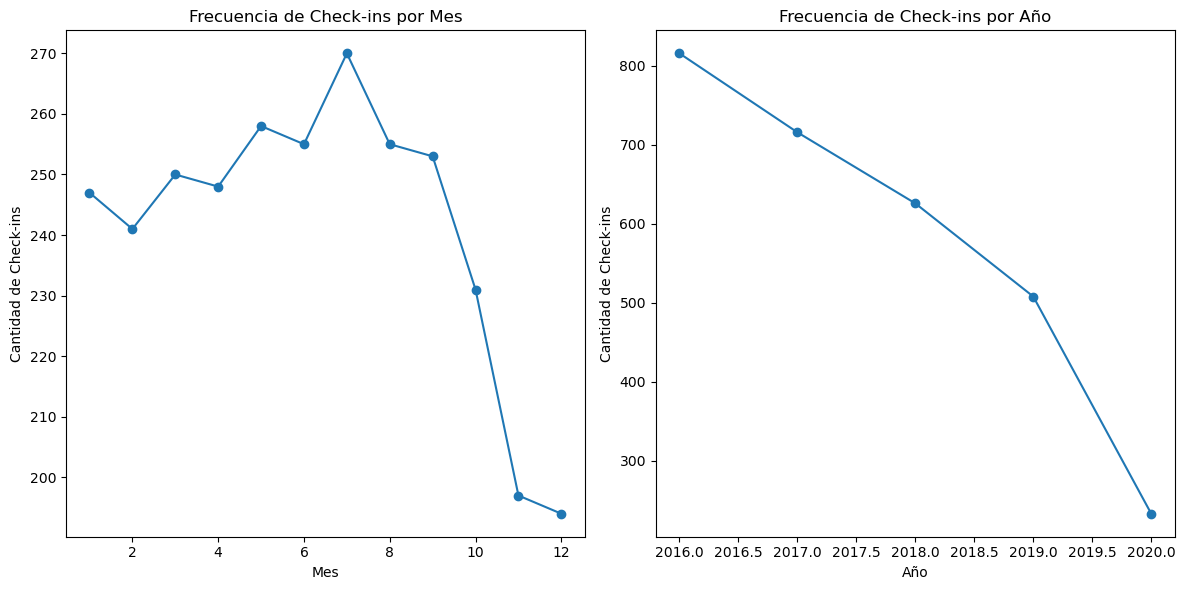

In [10]:
import matplotlib.pyplot as plt

# Agregar columnas de mes y año
filtered_df['year'] = filtered_df['date'].dt.year
filtered_df['month'] = filtered_df['date'].dt.month

# Calcular la frecuencia de check-ins por mes y por año
freq_by_month = filtered_df.groupby('month')['business_id'].count()
freq_by_year = filtered_df.groupby('year')['business_id'].count()

# Crear gráficos con Matplotlib
plt.figure(figsize=(12, 6))

# Gráfico por mes
plt.subplot(1, 2, 1)
plt.plot(freq_by_month.index, freq_by_month.values, marker='o')
plt.title('Frecuencia de Check-ins por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Check-ins')

# Gráfico por año
plt.subplot(1, 2, 2)
plt.plot(freq_by_year.index, freq_by_year.values, marker='o')
plt.title('Frecuencia de Check-ins por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Check-ins')

plt.tight_layout()

# Mostrar los gráficos
plt.show()

Soponemos que debido al dolar, bajo el nivel de chekins, ya que era caro vacacionar en EEUU.

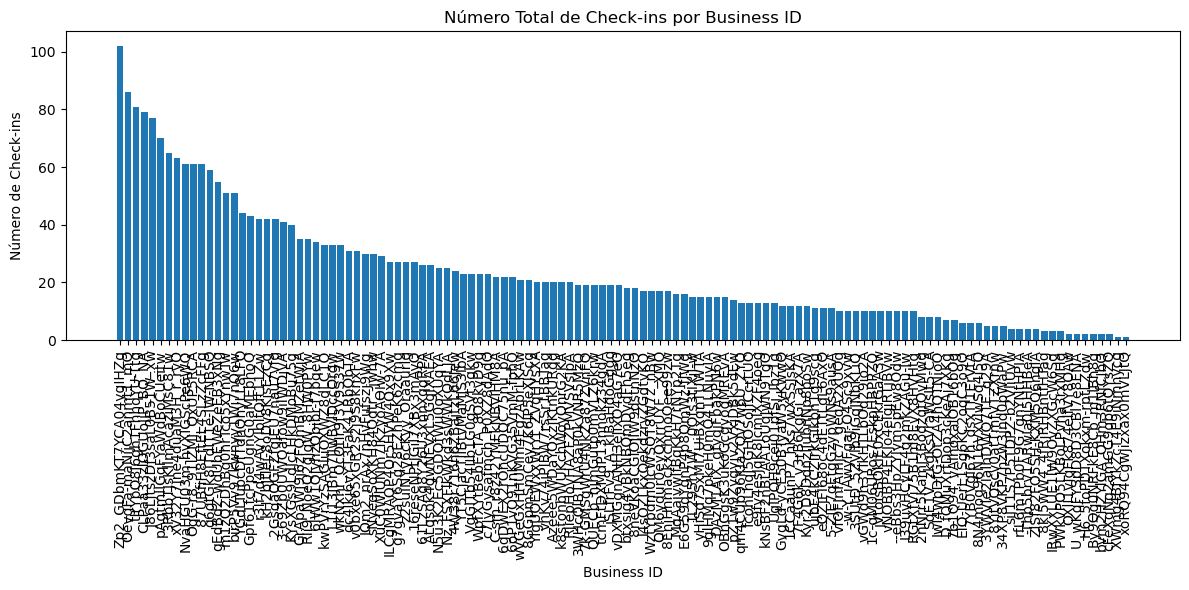

In [11]:
# Calcular el número total de check-ins por negocio
checkins_per_business = filtered_df.groupby('business_id')['date'].count().reset_index()

# Ordenar los datos por el número total de check-ins en orden descendente
checkins_per_business = checkins_per_business.sort_values(by='date', ascending=False)

# Crear el gráfico de barras con Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(checkins_per_business['business_id'], checkins_per_business['date'])
plt.xlabel('Business ID')
plt.ylabel('Número de Check-ins')
plt.title('Número Total de Check-ins por Business ID')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [12]:
# Calcular el promedio de check-ins por negocio
promedio_checkins_por_negocio = filtered_df.groupby('business_id')['date'].count().mean()

# Imprimir el promedio de check-ins por negocio
print(f'El promedio de check-ins por negocio es: {promedio_checkins_por_negocio:.2f}')

El promedio de check-ins por negocio es: 23.38


In [13]:
# Calcular el promedio de check-ins por negocio para cada business_id único
promedio_checkins_por_negocio = filtered_df.groupby('business_id')['date'].count().reset_index()
promedio_checkins_por_negocio.rename(columns={'date': 'Promedio de Check-ins'}, inplace=True)

# Imprimir el promedio de check-ins por negocio para cada business_id único
for index, row in promedio_checkins_por_negocio.iterrows():
    business_id = row['business_id']
    promedio = row['Promedio de Check-ins']
    print(f'Business ID: {business_id}, Promedio de Check-ins: {promedio:.2f}')


Business ID: --eBbs3HpZYIym5pEw8Qdw, Promedio de Check-ins: 10.00
Business ID: -Thb5brv1ARwIa0j5HHBeA, Promedio de Check-ins: 4.00
Business ID: -w-Y_iAwyFgaj-O4Sc9xvw, Promedio de Check-ins: 10.00
Business ID: 16reseNPtJGil7XBx3mAyQ, Promedio de Check-ins: 27.00
Business ID: 1CCaaunP7_hKs7wXSSJsKA, Promedio de Check-ins: 12.00
Business ID: 1L295h7W__0Ofs3tIXjI-w, Promedio de Check-ins: 15.00
Business ID: 1c-qM06URos7EskpHBPPZQ, Promedio de Check-ins: 10.00
Business ID: 2GsqaQGFZfqjEU7nau7vfg, Promedio de Check-ins: 42.00
Business ID: 2nNrr5KamJ3BodzqtOvMwg, Promedio de Check-ins: 8.00
Business ID: 3-69Zp0UWQafow9ilWDjvA, Promedio de Check-ins: 41.00
Business ID: 34XP8VKP7nzw3jnd0pWaPw, Promedio de Check-ins: 5.00
Business ID: 3RbbTJsKllmAcaziMsC81w, Promedio de Check-ins: 65.00
Business ID: 3SUtD_5ZVlb9iGqJNbKLiQ, Promedio de Check-ins: 10.00
Business ID: 3WHcQlBTNA8aP0kVNR5MzQ, Promedio de Check-ins: 19.00
Business ID: 3YWVle2IalnDWQ7TF_q29A, Promedio de Check-ins: 5.00
Business ID: 4

Y arriba pueden ver el promedio de chekins para cada hotel y más arriba el promedio de la cadena hotelera total

In [14]:
business_id_counts = filtered_df['business_id'].value_counts()
print(business_id_counts)

Zp2_GDbmKT7YCA04ygIHZg    102
OevgFa-maNijC2anmt1_mQ     86
tIrYpQ8I6gh1FhhqYU-Ttg     81
CLPaa33zlOGUoJjP_BQ_NA     79
J86LJtszDf3saL0B51W_xw     77
                         ... 
By9Qq0NRFkE8Cb_m1lBh8g      2
bvm2HZYlGA_OHm3RNfCJbQ      2
cFeXqNg2amGG9qb6tQYsZQ      2
XWmg4BfYkZcT4E9iNmnycg      1
xoRQ94Cgwjizxax0mVLJtQ      1
Name: business_id, Length: 124, dtype: int64
